In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

In [2]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler, random_split
import torchvision.transforms as transforms
import torch
import numpy as np
from collections import Counter
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import models



# Check for CUDA GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [ ]:
# #### With class 'Other'


# from torchvision import transforms
# from torch.utils.data import Dataset
# from PIL import Image
# import os
# from tqdm import tqdm
# from collections import Counter

# # Updated class mapping to combine classes into unique classes (including 'Augmented') 
# # put PVC and Other to one class
# class_mapping = {
#     #BigBag2
#     'BigBag2_1_PET': 0,  # PET
#     'BigBag2_2_PP': 1,   # PP
#     'BigBag2_3_PE': 2,   # PE
#     'BigBag2_4_Tetra': 3, # Tetra
#     'BigBag2_5_PVC': 5, # PVC
#     'BigBag2_6_PS': 4,   # PS
#     'BigBag2_7_Other': 6, # Other
#     'BigBag2_4_Tetra_Augmented': 3,  # Augmented Tetra
#     'BigBag2_6_PS_Augmented': 4,  # Augmented PS
    
#     #BigBag4
#     'BigBag4_1_PET': 0,  # PET
#     'BigBag4_2_PP': 1,   # PP
#     'BigBag4_3_PE': 2,   # PE
#     'BigBag4_4_Tetra': 3, # Tetra
#     'BigBag4_6_PS': 4,   # PS
#     'BigBag4_5_PVC': 5, # PVC
#     'BigBag4_7_Other': 6, # Other
    
#     #BigBag1
#     'BigBag1_1_PET': 0,  # PET
#     'BigBag1_2_PP': 1,   # PP
#     'BigBag1_3_PE': 2,   # PE
#     'BigBag1_4_Tetra': 3, # Tetra
#     #'BigBag2_4_Tetra_Augmented': 3,  # Augmented Tetra
#     #'BigBag2_5_PVC': 5, # PVC
#     'BigBag1_6_PS': 4,   # PS
#     'BigBag1_7_Other': 6, # Other
#     #'BigBag2_6_PS_Augmented': 4,  # Augmented PS
    
#     #BigBag3
#     'BigBag3_PET': 0,  # PET
#     'BigBag3_2_PP': 1,   # PP
#     'BigBag3_PE': 2,   # PE
#     'BigBag3_TETRA': 3, # Tetra
#     #'BigBag3_PVC': 5, # PVC
#     'BigBag3_6_PS': 4,   # PS
#     'BigBag3_Other': 6, # Other
    
#     'DWRL7_extension_2_PVC': 5, # 
#     'BigBag2_5_PVC_Augmented': 5,  # Augmented PVC
# }

# class CustomPlasticDataset(Dataset):
#     def __init__(self, root_dir, class_mapping, transform, tetra_transform=None, ps_transform=None, pvc_transform=None, diverse_transform=None):
#         self.root_dir = root_dir
#         self.class_mapping = class_mapping
#         self.transform = transform
#         self.tetra_transform = tetra_transform
#         self.ps_transform = ps_transform
#         self.pvc_transform = pvc_transform
#         self.diverse_transform = diverse_transform
#         self.image_paths = []
#         self.labels = []
        
#         # Gather image paths and labels
#         for class_folder in class_mapping.keys():
#             # Load original images
#             image_dir = os.path.join(root_dir, class_folder, 'images_cutout')
#             if os.path.exists(image_dir):
#                 image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
#                 print(f"Loaded {len(image_files)} original images for {class_folder}")
#                 self.image_paths.extend([os.path.join(image_dir, img) for img in image_files])
#                 self.labels.extend([class_mapping[class_folder]] * len(image_files))

#             # Load augmented images if they exist
#             augmented_dir = os.path.join(root_dir, class_folder)  # Path to the augmented class
#             if os.path.exists(augmented_dir) and 'Augmented' in class_folder:
#                 augmented_files = [f for f in os.listdir(augmented_dir) if f.endswith(('.jpg', '.png'))]
#                 print(f"Loaded {len(augmented_files)} augmented images for {class_folder}")
#                 self.image_paths.extend([os.path.join(augmented_dir, img) for img in augmented_files])
#                 self.labels.extend([class_mapping[class_folder]] * len(augmented_files))  # Map to the same class label

#     def __len__(self):
#         return len(self.image_paths)
    
#     def __getitem__(self, idx):
#         img_path = self.image_paths[idx]
#         image = Image.open(img_path)
#         label = self.labels[idx]
        
#         # Apply specific transformations based on class
#         if label == 3:  # Tetra
#             image = self.tetra_transform(image)
#         elif label == 4:  # PS
#             image = self.ps_transform(image)
#         elif label == 5:  # PVC
#             image = self.pvc_transform(image)
            
#         else:
#             # Use diverse_transform with a 50% chance for other classes
#             if self.diverse_transform is not None and random.random() > 0.5:
#                 image = self.diverse_transform(image)

#             else:
#                 image = self.transform(image)
        
#         return image, label


# # Augmentation for TETRA (Moderate)
# tetra_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(30),
#     transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
#     transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Augmentation for PS (Light)
# ps_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomCrop(224, padding=4),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Regular transform for other classes
# regular_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    
# ])
    
# # Augmentation for PVC (Light)
# pvc_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(15),
#     transforms.ColorJitter(brightness=0.3, contrast=0.3),
#     transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Define more diverse transformations for augmentation
# diverse_transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip with 50% probability
#     transforms.RandomRotation(degrees=30),  # Random rotation by up to 30 degrees
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color adjustments
#     transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),  # Random crop with resizing
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# def augment_and_save_images(original_dataset, class_label, transform, target_dir, num_augmented_images):
#     os.makedirs(target_dir, exist_ok=True)  # Create the target directory if it doesn't exist
#     class_images = [original_dataset.image_paths[idx] for idx, label in enumerate(original_dataset.labels) if label == class_label]

#     for img_path in tqdm(class_images, desc=f'Augmenting Class {class_label}'):
#         img = Image.open(img_path)
#         for i in range(num_augmented_images):
#             augmented_img = transform(img)  # Apply the transformation
#             augmented_img = transforms.ToPILImage()(augmented_img)  # Convert back to PIL Image
            
#             # Create a unique filename using the original filename and the index
#             base_filename = os.path.basename(img_path).split('.')[0]  # Get the original filename without extension
#             augmented_img.save(os.path.join(target_dir, f'augmented_{base_filename}_{i}.png'))  # Save with a unique name

# # Function to count images in each class
# def count_images_in_classes(base_dir, class_mapping):
#     class_counts = {class_name: 0 for class_name in class_mapping.keys()}

#     for class_name in class_mapping.keys():
#         # Check for original images
#         image_dir = os.path.join(base_dir, class_name, 'images_cutout')  # Original images path
#         if os.path.exists(image_dir):
#             image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
#             class_counts[class_name] += len(image_files)

#         # Check for augmented images in their respective folders
#         if 'Augmented' in class_name:
#             augmented_dir = os.path.join(base_dir, class_name)  # Path to the augmented class
#             if os.path.exists(augmented_dir):
#                 augmented_files = [f for f in os.listdir(augmented_dir) if f.endswith(('.jpg', '.png'))]
#                 class_counts[class_name] += len(augmented_files)  # Count augmented images

#     return class_counts

# # Directory where all class folders are stored
# data_dir = '/raid/home/somayeh.shami/project/somayeh_workspace/DWRL7/data'

# # Create dataset instance
# plastic_dataset = CustomPlasticDataset(
#     root_dir=data_dir, 
#     class_mapping=class_mapping, 
#     transform=regular_transform,
#     tetra_transform=tetra_transform,
#     ps_transform=ps_transform,
#     pvc_transform=pvc_transform,
#     diverse_transform=diverse_transform 
# )

# # After creating the dataset instance, count the classes
# initial_class_counts = Counter(plastic_dataset.labels)
# print('Initial ClassCounts after augmentation:', initial_class_counts)

Loaded 742 original images for BigBag2_1_PET
Loaded 1403 original images for BigBag2_2_PP
Loaded 1203 original images for BigBag2_3_PE
Loaded 192 original images for BigBag2_4_Tetra
Loaded 4 original images for BigBag2_5_PVC
Loaded 227 original images for BigBag2_6_PS
Loaded 1268 original images for BigBag2_7_Other
Loaded 1350 augmented images for BigBag2_4_Tetra_Augmented
Loaded 1694 augmented images for BigBag2_6_PS_Augmented
Loaded 904 original images for BigBag4_1_PET
Loaded 1483 original images for BigBag4_2_PP
Loaded 833 original images for BigBag4_3_PE
Loaded 173 original images for BigBag4_4_Tetra
Loaded 254 original images for BigBag4_6_PS
Loaded 3 original images for BigBag4_5_PVC
Loaded 1373 original images for BigBag4_7_Other
Loaded 458 original images for BigBag1_1_PET
Loaded 414 original images for BigBag1_2_PP
Loaded 518 original images for BigBag1_3_PE
Loaded 21 original images for BigBag1_4_Tetra
Loaded 47 original images for BigBag1_6_PS
Loaded 984 original images for

In [3]:
#### Without class 'Other'


from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import os
from tqdm import tqdm
from collections import Counter

# Updated class mapping to combine classes into unique classes (including 'Augmented')
# Removed the 'Other' class (class 6)
class_mapping = {
    #BigBag2
    'BigBag2_1_PET': 0,  # PET
    'BigBag2_2_PP': 1,   # PP
    'BigBag2_3_PE': 2,   # PE
    'BigBag2_4_Tetra': 3, # Tetra
    'BigBag2_5_PVC': 5,  # PVC
    'BigBag2_6_PS': 4,   # PS
    'BigBag2_4_Tetra_Augmented': 3,  # Augmented Tetra
    'BigBag2_6_PS_Augmented': 4,  # Augmented PS
    
    #BigBag4
    'BigBag4_1_PET': 0,  # PET
    'BigBag4_2_PP': 1,   # PP
    'BigBag4_3_PE': 2,   # PE
    'BigBag4_4_Tetra': 3, # Tetra
    'BigBag4_6_PS': 4,   # PS
    'BigBag4_5_PVC': 5,  # PVC
    
    #BigBag1
    'BigBag1_1_PET': 0,  # PET
    'BigBag1_2_PP': 1,   # PP
    'BigBag1_3_PE': 2,   # PE
    'BigBag1_4_Tetra': 3, # Tetra
    'BigBag1_6_PS': 4,   # PS
    
    #BigBag3
    'BigBag3_PET': 0,  # PET
    'BigBag3_2_PP': 1,   # PP
    'BigBag3_PE': 2,   # PE
    'BigBag3_TETRA': 3, # Tetra
    #'BigBag3_PVC': 5, # PVC
    'BigBag3_6_PS': 4,   # PS
    
    'DWRL7_extension_2_PVC': 5,  # PVC
    'BigBag2_5_PVC_Augmented': 5,  # Augmented PVC
}

class CustomPlasticDataset(Dataset):
    def __init__(self, root_dir, class_mapping, transform, tetra_transform=None, ps_transform=None, pvc_transform=None, diverse_transform=None):
        self.root_dir = root_dir
        self.class_mapping = class_mapping
        self.transform = transform
        self.tetra_transform = tetra_transform
        self.ps_transform = ps_transform
        self.pvc_transform = pvc_transform
        self.diverse_transform = diverse_transform
        self.image_paths = []
        self.labels = []
        
        # Gather image paths and labels
        for class_folder in class_mapping.keys():
            # Load original images
            image_dir = os.path.join(root_dir, class_folder, 'images_cutout')
            if os.path.exists(image_dir):
                image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
                print(f"Loaded {len(image_files)} original images for {class_folder}")
                self.image_paths.extend([os.path.join(image_dir, img) for img in image_files])
                self.labels.extend([class_mapping[class_folder]] * len(image_files))

            # Load augmented images if they exist
            augmented_dir = os.path.join(root_dir, class_folder)  # Path to the augmented class
            if os.path.exists(augmented_dir) and 'Augmented' in class_folder:
                augmented_files = [f for f in os.listdir(augmented_dir) if f.endswith(('.jpg', '.png'))]
                print(f"Loaded {len(augmented_files)} augmented images for {class_folder}")
                self.image_paths.extend([os.path.join(augmented_dir, img) for img in augmented_files])
                self.labels.extend([class_mapping[class_folder]] * len(augmented_files))  # Map to the same class label

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        label = self.labels[idx]
        
        # Apply specific transformations based on class
        if label == 3:  # Tetra
            image = self.tetra_transform(image)
        elif label == 4:  # PS
            image = self.ps_transform(image)
        elif label == 5:  # PVC
            image = self.pvc_transform(image)
        else:
            # Use diverse_transform with a 50% chance for other classes
            if self.diverse_transform is not None and random.random() > 0.5:
                image = self.diverse_transform(image)
            else:
                image = self.transform(image)
        
        return image, label


# Augmentation for TETRA (Moderate)
tetra_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Augmentation for PS (Light)
ps_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Regular transform for other classes
regular_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    
])
    
# Augmentation for PVC (Light)
pvc_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define more diverse transformations for augmentation
diverse_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip with 50% probability
    transforms.RandomRotation(degrees=30),  # Random rotation by up to 30 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color adjustments
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),  # Random crop with resizing
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def augment_and_save_images(original_dataset, class_label, transform, target_dir, num_augmented_images):
    os.makedirs(target_dir, exist_ok=True)  # Create the target directory if it doesn't exist
    class_images = [original_dataset.image_paths[idx] for idx, label in enumerate(original_dataset.labels) if label == class_label]

    for img_path in tqdm(class_images, desc=f'Augmenting Class {class_label}'):
        img = Image.open(img_path)
        for i in range(num_augmented_images):
            augmented_img = transform(img)  # Apply the transformation
            augmented_img = transforms.ToPILImage()(augmented_img)  # Convert back to PIL Image
            
            # Create a unique filename using the original filename and the index
            base_filename = os.path.basename(img_path).split('.')[0]  # Get the original filename without extension
            augmented_img.save(os.path.join(target_dir, f'augmented_{base_filename}_{i}.png'))  # Save with a unique name

# Function to count images in each class
def count_images_in_classes(base_dir, class_mapping):
    class_counts = {class_name: 0 for class_name in class_mapping.keys()}

    for class_name in class_mapping.keys():
        # Check for original images
        image_dir = os.path.join(base_dir, class_name, 'images_cutout')  # Original images path
        if os.path.exists(image_dir):
            image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
            class_counts[class_name] += len(image_files)

        # Check for augmented images in their respective folders
        if 'Augmented' in class_name:
            augmented_dir = os.path.join(base_dir, class_name)  # Path to the augmented class
            if os.path.exists(augmented_dir):
                augmented_files = [f for f in os.listdir(augmented_dir) if f.endswith(('.jpg', '.png'))]
                class_counts[class_name] += len(augmented_files)  # Count augmented images

    return class_counts

# Directory where all class folders are stored
data_dir = '/raid/home/somayeh.shami/project/somayeh_workspace/DWRL7/data'

# Create dataset instance
plastic_dataset = CustomPlasticDataset(
    root_dir=data_dir, 
    class_mapping=class_mapping, 
    transform=regular_transform,
    tetra_transform=tetra_transform,
    ps_transform=ps_transform,
    pvc_transform=pvc_transform,
    diverse_transform=diverse_transform 
)

# After creating the dataset instance, count the classes
initial_class_counts = Counter(plastic_dataset.labels)
print('Initial ClassCounts after augmentation:', initial_class_counts)

Loaded 742 original images for BigBag2_1_PET
Loaded 1403 original images for BigBag2_2_PP
Loaded 1203 original images for BigBag2_3_PE
Loaded 192 original images for BigBag2_4_Tetra
Loaded 4 original images for BigBag2_5_PVC
Loaded 227 original images for BigBag2_6_PS
Loaded 1350 augmented images for BigBag2_4_Tetra_Augmented
Loaded 1694 augmented images for BigBag2_6_PS_Augmented
Loaded 904 original images for BigBag4_1_PET
Loaded 1483 original images for BigBag4_2_PP
Loaded 833 original images for BigBag4_3_PE
Loaded 173 original images for BigBag4_4_Tetra
Loaded 254 original images for BigBag4_6_PS
Loaded 3 original images for BigBag4_5_PVC
Loaded 458 original images for BigBag1_1_PET
Loaded 414 original images for BigBag1_2_PP
Loaded 518 original images for BigBag1_3_PE
Loaded 21 original images for BigBag1_4_Tetra
Loaded 47 original images for BigBag1_6_PS
Loaded 391 original images for BigBag3_PET
Loaded 599 original images for BigBag3_2_PP
Loaded 345 original images for BigBag3_

In [4]:
# After creating the dataset instance, count the classes
initial_class_counts = Counter(plastic_dataset.labels)
print('Initial ClassCounts after augmentation:', initial_class_counts)

Initial ClassCounts after augmentation: Counter({1: 3899, 2: 2899, 5: 2616, 0: 2495, 4: 2400, 3: 1806})


In [5]:
from torch.utils.data import Subset, random_split
from collections import defaultdict, Counter
import random

# Step 1: Separate Original and Augmented Images by class
original_indices_by_class = defaultdict(list)
augmented_indices_by_class = defaultdict(list)

for i, (path, label) in enumerate(zip(plastic_dataset.image_paths, plastic_dataset.labels)):
    if 'Augmented' not in path:  # Original images
        original_indices_by_class[label].append(i)
    else:  # Augmented images
        augmented_indices_by_class[label].append(i)

# Step 2: Calculate test size based on total images (original + augmented)
test_indices = []
train_val_indices_by_class = defaultdict(list)

for label, original_indices in original_indices_by_class.items():
    total_images_in_class = len(original_indices) + len(augmented_indices_by_class[label])  # Total images in class
    test_size = int(0.1 * total_images_in_class)  # 10% of total images (original + augmented)
    
    # Ensure there are enough original images to select from for the test set
    if test_size > len(original_indices):
        raise ValueError(f"Not enough original images in class {label} for test set.")
    
    random.shuffle(original_indices)  # Shuffle for randomness
    test_indices.extend(original_indices[:test_size])  # First 10% goes to test set
    train_val_indices_by_class[label].extend(original_indices[test_size:])  # Remaining original images

# Step 3: Combine remaining original and augmented images for training/validation split
train_val_indices = []
for label, original_remaining in train_val_indices_by_class.items():
    train_val_indices.extend(original_remaining)  # Add remaining original images
    train_val_indices.extend(augmented_indices_by_class[label])  # Add augmented images for this class

# Step 4: Split the remaining images into training and validation sets (80/20 split)
train_size = int(0.8 * len(train_val_indices))  # 80% for training
val_size = len(train_val_indices) - train_size  # 20% for validation

# Randomly split the combined dataset into train and validation sets
train_indices, val_indices = random_split(train_val_indices, [train_size, val_size])

# Step 5: Create Subsets for train, validation, and test sets
train_dataset = Subset(plastic_dataset, train_indices)
val_dataset = Subset(plastic_dataset, val_indices)
test_dataset = Subset(plastic_dataset, test_indices)  # Test set with only original images

# Step 6: Print and check sizes
print(f'Training set size (with original + augmented): {len(train_dataset)}')
print(f'Validation set size (with original + augmented): {len(val_dataset)}')
print(f'Test set size (with original only): {len(test_dataset)}')

# Optional: Count the number of images per class in the test set
test_class_counts = Counter(plastic_dataset.labels[i] for i in test_indices)
print("Test set class distribution:", test_class_counts)

Training set size (with original + augmented): 11605
Validation set size (with original + augmented): 2902
Test set size (with original only): 1608
Test set class distribution: Counter({1: 389, 2: 289, 5: 261, 0: 249, 4: 240, 3: 180})


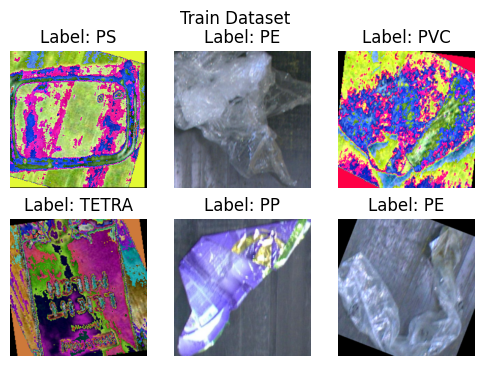

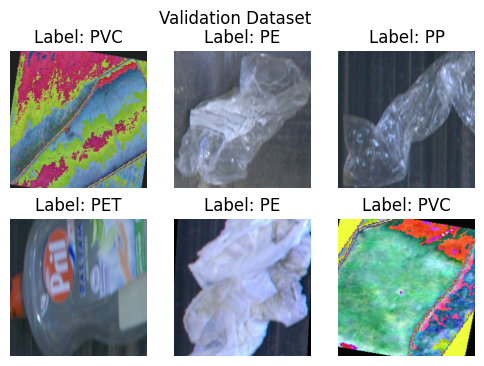

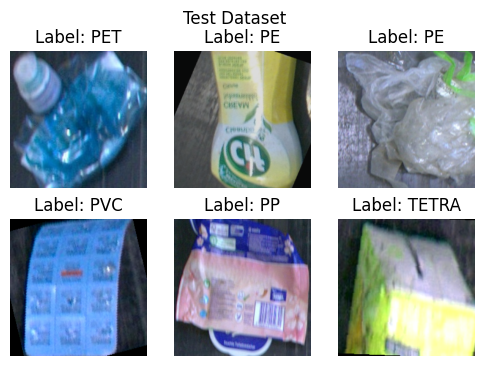

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to show multiple images with labels
def show_images_from_dataset(dataset, num_images_to_show, class_names, title):
    plt.figure(figsize=(6, 4))
    
    for i in range(num_images_to_show):
        idx = random.randint(0, len(dataset) - 1)  # Get a random index
        image, label = dataset[idx]  # Get the image and label

        image = image.cpu().numpy()  # Move tensor to CPU and convert to numpy
        image = np.transpose(image, (1, 2, 0))  # Transpose to (H, W, C)

        # Unnormalize the image
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean  # Revert normalization
        image = np.clip(image, 0, 1)  # Clip values to [0, 1]

        plt.subplot(2, 3, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {class_names[label]}")
        plt.axis("off")
    
    plt.suptitle(title)
    plt.show()

# Class names for the dataset
class_names = ['PET', 'PP', 'PE', 'TETRA', 'PS', 'PVC', 'Other']

# Number of images to show
num_images_to_show = 6

# Show 6 random images from the training, validation, and test datasets
show_images_from_dataset(train_dataset, num_images_to_show, class_names, "Train Dataset")
show_images_from_dataset(val_dataset, num_images_to_show, class_names, "Validation Dataset")
show_images_from_dataset(test_dataset, num_images_to_show, class_names, "Test Dataset")

In [7]:
from torch.utils.data import DataLoader, WeightedRandomSampler
from collections import Counter

# Count the frequency of each class in the entire dataset (for reference)
class_counts = Counter(plastic_dataset.labels)
print('ClassCounts (entire dataset):', class_counts)

# Count the frequency of each class in the training dataset
train_labels = [plastic_dataset.labels[i] for i in train_dataset.indices]
train_class_counts = Counter(train_labels)

# Check for zero counts and prevent division by zero
if any(count == 0 for count in train_class_counts.values()):
    print("Warning: One or more classes have zero counts in the training dataset!")

# Step 1: Calculate weights for the training dataset
train_class_weights = {cls: 1.0 / count if count > 0 else 0.0 for cls, count in train_class_counts.items()}
print("Training Class Weights:", train_class_weights)

# Step 2: Create sample weights based on the training labels
sample_weights = [train_class_weights[label] for label in train_labels]
print("Sample Weights (sample of first 10):", sample_weights[:10])  # Show a small sample for debugging

# Step 3: Create a WeightedRandomSampler for the training dataset
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Step 4: Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)  # Weighted sampling for training
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)  # No sampling for validation
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)  # No sampling for testing

# Step 5: Print to confirm sizes and weights
print(f'Training set size (with original + augmented): {len(train_dataset)}')
print(f'Validation set size (with original + augmented): {len(val_dataset)}')
print(f'Test set size (original only): {len(test_dataset)}')
print("Training class weights:", train_class_weights)

ClassCounts (entire dataset): Counter({1: 3899, 2: 2899, 5: 2616, 0: 2495, 4: 2400, 3: 1806})
Training Class Weights: {1: 0.00035536602700781805, 2: 0.0004768717215069146, 3: 0.0007639419404125286, 0: 0.0005640157924421884, 5: 0.0005376344086021505, 4: 0.0005707762557077625}
Sample Weights (sample of first 10): [0.00035536602700781805, 0.00035536602700781805, 0.0004768717215069146, 0.0004768717215069146, 0.00035536602700781805, 0.0004768717215069146, 0.0007639419404125286, 0.0005640157924421884, 0.0005376344086021505, 0.0004768717215069146]
Training set size (with original + augmented): 11605
Validation set size (with original + augmented): 2902
Test set size (original only): 1608
Training class weights: {1: 0.00035536602700781805, 2: 0.0004768717215069146, 3: 0.0007639419404125286, 0: 0.0005640157924421884, 5: 0.0005376344086021505, 4: 0.0005707762557077625}


In [8]:
print(f'Training loader length: {len(train_loader)}')
print(f'Validation loader length: {len(val_loader)}')
print(f'Test loader length: {len(test_loader)}')

Training loader length: 363
Validation loader length: 91
Test loader length: 51


In [9]:
for idx, (inputs, labels) in enumerate(train_loader):
    print(f'Batch index: {idx}, Inputs shape: {inputs.shape}, Labels shape: {labels.shape}')
    if idx == 0:  # Just show the first batch
        break

Batch index: 0, Inputs shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])


In [10]:
import torch
import torch.nn as nn
from collections import Counter

# Count the frequency of each class in the training dataset only (since we will apply the weights in training)
train_labels = [plastic_dataset.labels[i] for i in train_dataset.indices]
train_class_counts = Counter(train_labels)

# Print class counts for debugging
print('Training ClassCounts:', train_class_counts)

# Calculate weights for each class: inverse of frequency for the classes (0 to 6)
class_weights = {cls: 1.0 / count for cls, count in train_class_counts.items() if cls < 6}  # Classes 0-6  #### change 7 to 6 when I removed class 'Other'

# Apply the reduction factor for the "Other" class (class 6)
# if 6 in class_weights:
#     class_weights[6] *= other_class_weight_reduction_factor
    
# Create class_weight_tensor based on the actual class labels (0 to 6)
class_weight_tensor = torch.tensor([1.0] * 6).to(device)  # Default weights if not using sampler (1.0 for all classes)    #### change 7 to 6 when I removed class 'Other'
class_weight_tensor = torch.tensor([class_weights.get(i, 0.0) for i in range(6)]).to(device)  # Weights for classes 0-6   #### change 7 to 6 when I removed class 'Other'

# Use CrossEntropyLoss with class weights
criterion = nn.CrossEntropyLoss(weight=class_weight_tensor)

# Print class weights for debugging
print("Class weights for loss function:", class_weight_tensor)
print("Class weight tensor shape:", class_weight_tensor.shape)  # Should be [7]

Training ClassCounts: Counter({1: 2814, 2: 2097, 5: 1860, 0: 1773, 4: 1752, 3: 1309})
Class weights for loss function: tensor([0.0006, 0.0004, 0.0005, 0.0008, 0.0006, 0.0005], device='cuda:0')
Class weight tensor shape: torch.Size([6])


In [11]:
# Calculate the total sum of class weights
total_weight = sum(class_weight_tensor.cpu().numpy())

# Normalize the weights
normalized_class_weight_tensor = class_weight_tensor / total_weight

# Convert back to tensor if necessary
normalized_class_weight_tensor = normalized_class_weight_tensor.to(device)

# Print the normalized weights for debugging
print("Normalized Class Weights:", normalized_class_weight_tensor)

# Use CrossEntropyLoss with class weights
criterion = nn.CrossEntropyLoss(weight=normalized_class_weight_tensor)

Normalized Class Weights: tensor([0.1726, 0.1087, 0.1459, 0.2337, 0.1746, 0.1645], device='cuda:0')


In [12]:
def prepare_model(num_classes=6):   #### change 7 to 6 when I removed class 'Other'
    """Load a pre-trained Resnet18 model and modify it for DWRL."""
    model = models.resnet18(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model

In [32]:
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} samples")

Class 0: 2495 samples
Class 1: 3899 samples
Class 2: 2899 samples
Class 3: 1806 samples
Class 5: 2616 samples
Class 4: 2400 samples
Class 6: 4327 samples


In [14]:
import torch
from tqdm import tqdm
from torch.utils.data import WeightedRandomSampler, DataLoader
from collections import Counter
import torch.optim as optim

# Define class names and number of classes
class_names = ['PET', 'PP', 'PE', 'TETRA', 'PS', 'PVC'] #### Add Other 
num_classes = len(class_names)

# Prepare the model for Transfer Learning
model = prepare_model(num_classes=num_classes).to(device)

# Set up the optimizer for fine-tuning
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define number of epochs and EWC parameters if you plan to use EWC later
num_epochs = 20
ewc = None  # Set this up if using Elastic Weight Consolidation (EWC)
lambda_ewc = 0.01  # Adjust as needed for EWC regularization

# Training function with validation and test evaluation
def train_model(
    model, train_loader, val_loader, test_loader, criterion, optimizer, num_epochs, ewc=None, lambda_ewc=0.0
):
    """Train the model and validate it after each epoch, optimized for Transfer Learning."""
    
    best_val_accuracy = 0.0
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            if ewc is not None:
                ewc_loss = ewc.ewc_loss(model, lambda_ewc)
                loss += ewc_loss

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total

        # Validation loop
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        
        # Initialize arrays for class-wise accuracy
        val_class_correct = [0] * num_classes
        val_class_total = [0] * num_classes

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                # Update class counts
                for i in range(len(labels)):
                    val_class_total[labels[i].item()] += 1
                    val_class_correct[labels[i].item()] += (predicted[i] == labels[i]).item()

        val_loss = val_running_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total

        # Calculate and print class-wise accuracy
        val_class_accuracy = [
            100 * val_class_correct[i] / val_class_total[i] if val_class_total[i] > 0 else 0
            for i in range(num_classes)
        ]

        print(f'Epoch {epoch+1}/{num_epochs} - '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        for i, acc in enumerate(val_class_accuracy):
            print(f'Accuracy for class {i} ({class_names[i]}): {acc:.2f}%')

        # Test loop
        test_running_loss = 0.0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                test_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()

        # Calculate average test loss and accuracy
        average_test_loss = test_running_loss / len(test_loader)
        test_accuracy = 100 * test_correct / test_total

        print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

        # Save the best model by validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), 'best_model_tl_withOUTOther.pth')

# Call the training function
train_model(
    model, train_loader, val_loader, test_loader, criterion, optimizer,
    num_epochs=num_epochs, ewc=ewc, lambda_ewc=lambda_ewc
)

/raid/home/somayeh.shami/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/raid/home/somayeh.shami/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/20: 100%|██████████| 363/363 [01:56<00:00,  3.10it/s]


Epoch 1/20 - Train Loss: 0.4555, Train Accuracy: 80.24%, Val Loss: 0.3809, Val Accuracy: 80.32%
Accuracy for class 0 (PET): 88.97%
Accuracy for class 1 (PP): 43.39%
Accuracy for class 2 (PE): 88.99%
Accuracy for class 3 (TETRA): 96.60%
Accuracy for class 4 (PS): 96.11%
Accuracy for class 5 (PVC): 93.67%
Test Loss: 0.4415, Test Accuracy: 78.61%


Epoch 2/20: 100%|██████████| 363/363 [01:46<00:00,  3.40it/s]


Epoch 2/20 - Train Loss: 0.2748, Train Accuracy: 87.79%, Val Loss: 0.3180, Val Accuracy: 86.39%
Accuracy for class 0 (PET): 91.08%
Accuracy for class 1 (PP): 69.12%
Accuracy for class 2 (PE): 82.49%
Accuracy for class 3 (TETRA): 94.44%
Accuracy for class 4 (PS): 99.08%
Accuracy for class 5 (PVC): 96.38%
Test Loss: 0.3800, Test Accuracy: 84.39%


Epoch 3/20: 100%|██████████| 363/363 [01:44<00:00,  3.49it/s]


KeyboardInterrupt: 

/raid/home/somayeh.shami/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/raid/home/somayeh.shami/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


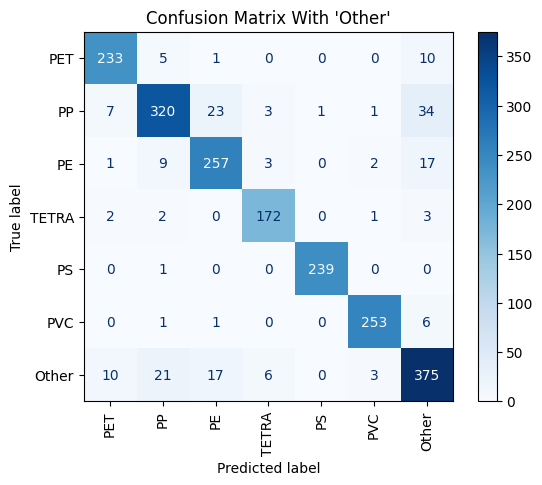

Confusion matrix for model with 'Other' saved at: /raid/home/somayeh.shami/project/somayeh_workspace/DWRL7/models/confusion_matrix_with_Other.png


In [33]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models

# Specify the path to your saved model (with "Other" class)
model_path_with_other = '/raid/home/somayeh.shami/project/somayeh_workspace/DWRL7/models/best_model_tl.pth'

# Define number of classes and class names
num_classes = 7  # PET, PP, PE, Tetra, PS, PVC, Other
class_names = ['PET', 'PP', 'PE', 'TETRA', 'PS', 'PVC', 'Other']

# Load the saved model with "Other" class
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_path_with_other))
model.to(device)
model.eval()

# Initialize lists to store true and predicted labels
all_true_labels = []
all_pred_labels = []

# Iterate over test data
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Store labels
        all_true_labels.extend(labels.cpu().numpy())
        all_pred_labels.extend(predicted.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_pred_labels, labels=np.arange(num_classes))

# Display and save confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix With 'Other'")

# Show plot
plt.show()

# Define save path and save the plot
save_path = '/raid/home/somayeh.shami/project/somayeh_workspace/DWRL7/models/confusion_matrix_with_Other.png'
plt.savefig(save_path)
plt.close()
print(f"Confusion matrix for model with 'Other' saved at: {save_path}")

/raid/home/somayeh.shami/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/raid/home/somayeh.shami/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


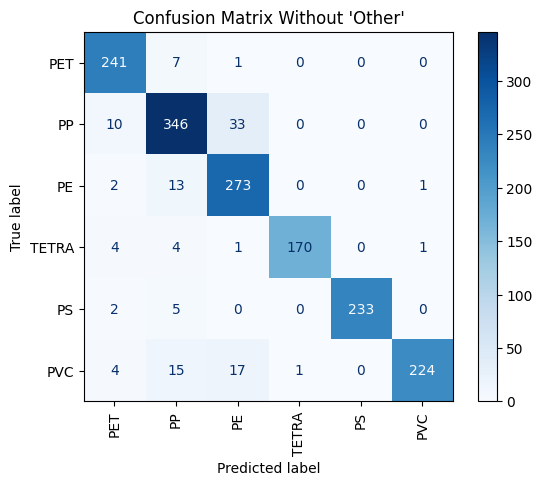

Confusion matrix for model without 'Other' saved at: /raid/home/somayeh.shami/project/somayeh_workspace/DWRL7/models/confusion_matrix_without_Other.png


In [14]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models

# Specify the path to your saved model (without "Other" class)
model_path_without_other = '/raid/home/somayeh.shami/project/somayeh_workspace/DWRL7/models/best_model_tl_withOUTOther.pth'

# Define number of classes and class names
num_classes = 6  # PET, PP, PE, Tetra, PS, PVC
class_names = ['PET', 'PP', 'PE', 'TETRA', 'PS', 'PVC']

# Load the saved model without "Other" class
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_path_without_other))
model.to(device)
model.eval()

# Initialize lists to store true and predicted labels
all_true_labels = []
all_pred_labels = []

# Iterate over test data
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Store labels
        all_true_labels.extend(labels.cpu().numpy())
        all_pred_labels.extend(predicted.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_pred_labels, labels=np.arange(num_classes))

# Display and save confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix Without 'Other'")

# Show plot
plt.show()

# Define save path and save the plot
save_path = '/raid/home/somayeh.shami/project/somayeh_workspace/DWRL7/models/confusion_matrix_without_Other.png'
plt.savefig(save_path)
plt.close()
print(f"Confusion matrix for model without 'Other' saved at: {save_path}")